Depth: 26
CNOTS: 10


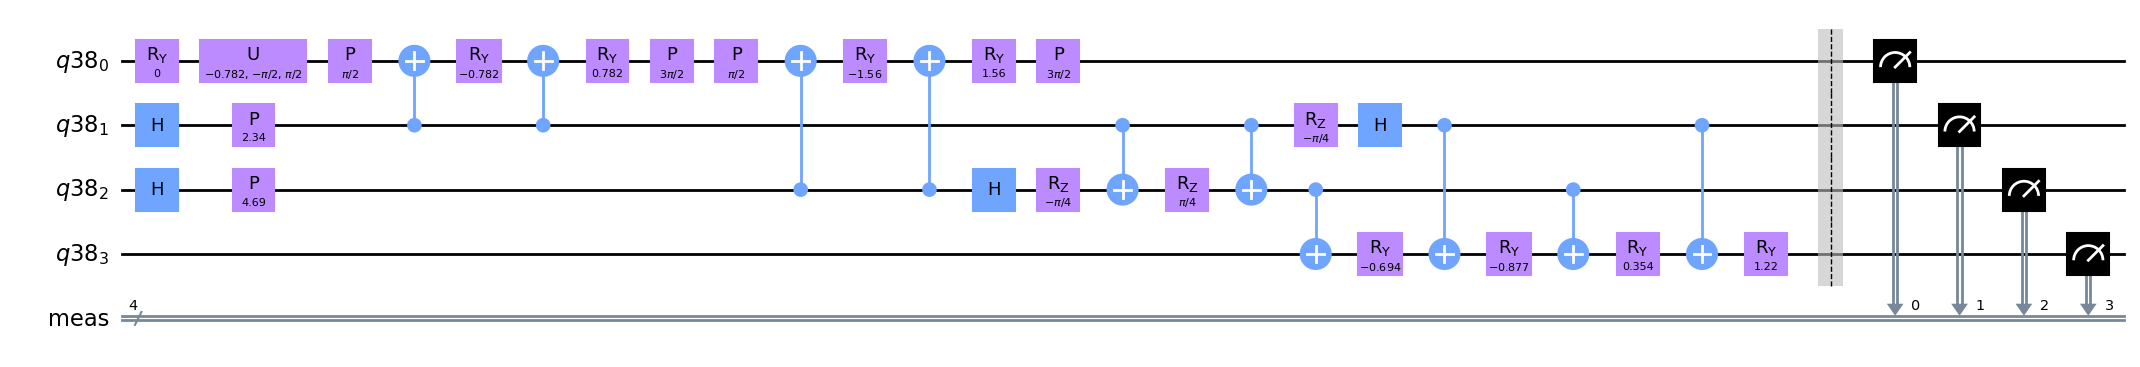

In [36]:
from qiskit import QuantumRegister, QuantumCircuit
import numpy as np

t = 2.344915690192344  # This is  optimal

NUM_QUBITS = 4  # Total number of qubits
nb = 1  # Number of qubits representing the solution
nl = 2  # Number of qubits representing the eigenvalues

theta = 0  # Angle defining |b>

a = 1  # Matrix diagonal
b = -1/3  # Matrix off-diagonal

# Initialize the quantum and classical registers
qr = QuantumRegister(NUM_QUBITS)

# Create a Quantum Circuit
qc = QuantumCircuit(qr)

qrb = qr[0:nb]
qrl = qr[nb:nb+nl]
qra = qr[nb+nl:nb+nl+1]

# State preparation.
qc.ry(2*theta, qrb[0])

# QPE with e^{iAt}
for qu in qrl:
    qc.h(qu)

qc.p(a*t, qrl[0])
qc.p(a*t*2, qrl[1])

qc.u(b*t, -np.pi/2, np.pi/2, qrb[0])


# Controlled e^{iAt} on \lambda_{1}:
params=b*t

qc.p(np.pi/2,qrb[0])
qc.cx(qrl[0],qrb[0])
qc.ry(params,qrb[0])
qc.cx(qrl[0],qrb[0])
qc.ry(-params,qrb[0])
qc.p(3*np.pi/2,qrb[0])

# Controlled e^{2iAt} on \lambda_{2}:
params = b*t*2

qc.p(np.pi/2,qrb[0])
qc.cx(qrl[1],qrb[0])
qc.ry(params,qrb[0])
qc.cx(qrl[1],qrb[0])
qc.ry(-params,qrb[0])
qc.p(3*np.pi/2,qrb[0])

# Inverse QFT
qc.h(qrl[1])
qc.rz(-np.pi/4,qrl[1])
qc.cx(qrl[0],qrl[1])
qc.rz(np.pi/4,qrl[1])
qc.cx(qrl[0],qrl[1])
qc.rz(-np.pi/4,qrl[0])
qc.h(qrl[0])

# Eigenvalue rotation
t1=(-np.pi +np.pi/3 - 2*np.arcsin(1/3))/4
t2=(-np.pi -np.pi/3 + 2*np.arcsin(1/3))/4
t3=(np.pi -np.pi/3 - 2*np.arcsin(1/3))/4
t4=(np.pi +np.pi/3 + 2*np.arcsin(1/3))/4

qc.cx(qrl[1],qra[0])
qc.ry(t1,qra[0])
qc.cx(qrl[0],qra[0])
qc.ry(t2,qra[0])
qc.cx(qrl[1],qra[0])
qc.ry(t3,qra[0])
qc.cx(qrl[0],qra[0])
qc.ry(t4,qra[0])
qc.measure_all()

print(f"Depth: {qc.depth()}")
print(f"CNOTS: {qc.count_ops()['cx']}")
qc.draw("mpl", fold=-1)



In [37]:
from qiskit import Aer, transpile
from qiskit.utils.mitigation import complete_meas_cal

backend =  Aer.get_backend("aer_simulator")# calibrate using real hardware
layout = [2,3,0,4]
chip_qubits = 5

# Transpiled circuit for the real hardware
qc_qa_cx = transpile(qc, backend=backend, initial_layout=layout)

meas_cals, state_labels = complete_meas_cal(qubit_list=layout,
                                            qr=QuantumRegister(chip_qubits))
qcs = meas_cals + [qc_qa_cx]

job = backend.run(qcs, shots=1000)

C:\Users\fouad\AppData\Local\Temp\ipykernel_14404\113694207.py:11: DeprecationWarning: The function ``qiskit.utils.mitigation.circuits.complete_meas_cal()`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  meas_cals, state_labels = complete_meas_cal(qubit_list=layout,


{'0000': 1000}
{'0001': 1000}
{'0010': 1000}
{'0011': 1000}
{'0100': 1000}
{'0101': 1000}
{'0110': 1000}
{'0111': 1000}
{'1000': 1000}
{'1001': 1000}
{'1010': 1000}
{'1011': 1000}
{'1100': 1000}
{'1101': 1000}
{'1110': 1000}
{'1111': 1000}
{'1101': 229, '1010': 66, '1100': 257, '0011': 199, '0010': 183, '1011': 66}


<BarContainer object of 6 artists>

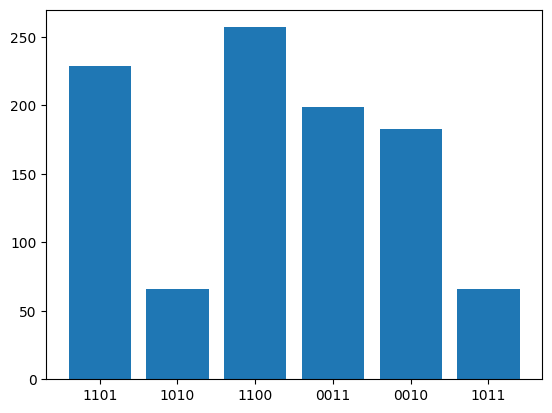

In [38]:
import matplotlib.pyplot as plt
result = job.result()
o = result.get_counts()
for i in range(len(o)):
    print(o[i])

plt.bar(o[len(o)-1].keys(), o[len(o)-1].values())

